
<div align="center">
    <div style="background: linear-gradient(to right, #fff, #f0f0f0, #fff); padding: 40px; margin: 20px;">
        <h1 style="color: #1a73e8; font-size: 46px; margin-bottom: 20px;"></h1>
        <h3 style="color: #666; font-size: 28px; font-weight: normal;">Exploration des capacités des LLMs à l'extraction de l'information utile d'un texte long</h3>
        <p style="background-color: #1a73e8; color: white; font-size: 22px; padding: 15px 30px; display: inline-block; border-radius: 8px; margin-top: 20px;">
        Application au cas d'usage: résumé d'étude médicale avant soumission
        </p>
    </div>
    <br>
</div>

## 1. Introduction et Cadre du travail

---

### 1.1 Enjeux du résumé Scientifique

La publication d'articles scientifiques dans le domaine médical représente un pilier fondamental de l'avancée des connaissances en santé. L'abstract, en tant que vitrine de l'article, joue un rôle crucial dans :
- La décision initiale des reviewers d'approfondir l'étude
- L'indexation et la découvrabilité de l'article dans les bases de données
- La dissémination rapide des résultats clés auprès de la communauté scientifique

### 1.2 Défis Actuels

La rédaction d'abstracts scientifiques est un défi à enjeux importants:

- Contraintes Structurelles

Format IMRAD (Introduction, Methods, Results, and Discussion)

Limite stricte de mots (généralement 250-300)

Nécessité d'inclure des données quantitatives précises


- Enjeux de Publication

Les revues à fort impact (Nature, The Lancet, etc.) rejettent jusqu'à 95% des soumissions

L'abstract influence significativement la décision initiale d'examiner l'article


- Besoins des Chercheurs

Temps considérable consacré à la rédaction et révision des abstracts

Nécessité de maintenir un équilibre entre exhaustivité et concision

Importance de la reproductibilité des résultats présentés (inclure des données quantitatives)

### 1.3 Potentiel des LLMs pour cette tâche

Les Large Language Models (LLMs) offrent des perspectives prometteuses pour cette tâche car ils sont dotés des outils permettant une compréhension et une représentation de la sémantique à diverses granularités (mot, phrase, paragraphe..). Les LLMs sont également aptes à adapter le style et le niveau du détail de leurs génération de texte.

### 1.4 Objectifs de ce travail

Mettre en application l'apport théorique du cours et l'approfondir

Explorer au moins un grand modèle de langage et une méthode de résumé adaptées à des articles d'études médicales observationnelles et en double aveugle.

Tester diverses méthodes d'adaptation du modèle et des méthodes pour spécialiser le traitement algorithmique à cette tâche, dont la performance sera évaluée quantitavement et qualitativement


## 2. Choix des Outils et des Méthodes

---

### 2.1 Modèle LLaMA-3-8B-UltraMedical



LLaMA-3-8B-UltraMedical [1] est une adaptation spécialisée du modèle LLaMA-3 de Meta pour le domaine biomédical. Ce modèle, développé par le laboratoire Tsinghua C3I, se distingue par :

1. **Spécialisation sur une Base de Données médicale riche**
   - 410 000 données texutuelles qualitatives du monde biomédical
   - Validation par des experts du monde de la biologie et la médecine

2. **Performance à l'état de l'art sur le sujet**
   - Leader des modèles 8B sur les benchmarks médicaux
   - Scores MMLU Medical supérieurs à OpenBioLM-8B et Gemini-7B
   - Capacités multi-tâches en biologie et médecine

Ce modèle offrait par conséquent la capacité native d'avoir une bonne représentation des termes médicaux et scientifiques. Certains de ces termes peuvent en effet être rares en dehors de leur domaine et souffrir par conséquent d'une représentation biaisée dans un modèle non spécialisé, comme par exemple le nom d une molécule chimique peu connue. D'autres termes peuvent être utilisés dans le langage courant avec un glissement sémantique trop important par rapport à leur signification médicale, comme par exemple les notions de "aigue" et "chronique" qui ont rapport à la durée en médical et à la gravité en langage courant.

La taille de ce modèle est également une raison de l'avoir choisi, car il était possible de l'exploiter avec des ressources gratuites sans trop de ralentissement.

## 2.2 Résumé Extractif vs Résumé Abstractif

La tâche de résumé automatique se divise traditionnellement en deux approches distinctes : extractive et abstractive. Ces méthodes présentent des caractéristiques et des défis spécifiques, particulièrement pertinents dans le contexte médical.

### 2.2.1 Approche Extractive

L'approche extractive consiste à sélectionner et à organiser les phrases les plus pertinentes du texte source [2][3].

**Exemple d'extraction :**
Texte source : "Les patients atteints de diabète de type 2 présentent un risque
accru de complications cardiovasculaires. Une étude sur 1000 patients a montré
que le contrôle glycémique strict réduit ce risque de 25%."
Phrases extraites : "Une étude sur 1000 patients a montré que le contrôle
glycémique strict réduit ce risque de 25%."

### 2.2.2 Approche Abstractive

L'approche abstractive, plus récente, génère un nouveau texte en reformulant l'information source [4]. Cette approche permet une meilleure adaptation au style des abstracts scientifiques.

**Exemple d'abstraction :**
Texte source : "Les patients atteints de diabète de type 2 présentent un risque
accru de complications cardiovasculaires. Une étude sur 1000 patients a montré
que le contrôle glycémique strict réduit ce risque de 25%."
Résumé abstractif : "Cette étude démontre l'efficacité du contrôle glycémique
strict dans la réduction des complications cardiovasculaires chez les
diabétiques de type 2, avec une diminution significative du risque de 25%
(n=1000)."

### 2.2.3 Analyse Comparative

Les deux approches présentent des avantages et limitations spécifiques :

| Critère | Extractif | Abstractif |
|---------|-----------|------------|
| Fidélité | 94.2% | 87.6% |
| Temps de calcul | O(n) | O(n²) |


Dans le contexte médical, la fidélité de l'information est cruciale. Lawrence et al. [5] ont montré que les résumés extractifs présentent un taux d'erreur factuelle de seulement 3.2%, contre 8.7% pour les résumés abstractifs sur un corpus d'articles médicaux.

### 2.2.4 Approche Hybride

Les travaux récents tendent vers des approches hybrides. proposent une architecture combinant :
- Sélection extractive des passages clés
- Reformulation abstractive contrôlée
- Vérification de la cohérence

Dans ce travail, la méthode de départ est extractive simple, elle sera améliorée au fil du notebook.



## 3. Travail Expérimental

---

### 3.1. Préparation et Aperçu des données

- **Packages nécéssaires à l'environnement**

In [ ]:
!pip install rouge-score accelerate  sentencepiece transformers chardet numba trl peft fsspec==2024.10.0
!pip install bitsandbytes==0.43.1
!pip install vllm
!pip install nltk
!pip install spacy
!pip install sacrebleu pycocoevalcap

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.3 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3061, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py",

- **Import des packages et connexion au drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
wd = "/content/drive/MyDrive/LLMs"


import os
# fixer le repertoire de travail
os.chdir(wd)

# Imports essentiels
import torch
import transformers
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
import pandas as pd
import numpy as np
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt_tab', force=True)


Mounted at /content/drive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

- **Conditionnement des données sous une forme facilement exploitatble**

Nos données (train et test), se présentent initialement sous forme de deux répertoires à plusieurs niveaux. C'est potentiellement un risque de bug dans un pipeline d'exploitation. Le choix est de faire deux tableaux unifiés, un pour le test et un pour le train qui capturent toute l'information : référence, type, contenu, et abstract si présent.

In [ ]:
# Chemins du dossier train
base_dir = "./datasets/train/"
paths = {
    "OBS": {
        "articles": os.path.join(base_dir, "OBS/articles_OBS"),
        "abstracts": os.path.join(base_dir, "OBS/abstracts_OBS"),
    },
    "RCT": {
        "articles": os.path.join(base_dir, "RCT/articles_RCT"),
        "abstracts": os.path.join(base_dir, "RCT/abstracts_RCT"),
    },
}

data = []

# Fonction pour lire un fichier avec encodage inconnu
def lire_fichier(chemin):
    # lire en raw bytes
    with open(chemin, 'rb') as f:
        raw = f.read()

    # Detecter l'encoding
    detected = chardet.detect(raw)
    encoding = detected['encoding']


    return raw.decode(encoding)

# Parcourir les origines (OBS, RCT)
for origine, dirs in paths.items():
    articles_dir = dirs["articles"]
    abstracts_dir = dirs["abstracts"]

    # Parcourir les fichiers articles
    for article_file in os.listdir(articles_dir):
        if article_file.endswith(".txt"):
            # Extraire le numéro de référence du nom de fichier
            reference = ''.join(filter(str.isdigit, article_file))

            # Vérifier si le numéro de référence a bien été extrait
            if not reference:
                print(f"Nom de fichier non valide : {article_file}")
                continue

            # Lire le contenu de l'article
            article_path = os.path.join(articles_dir, article_file)
            contenu = lire_fichier(article_path)

            # Chercher l'abstract correspondant
            abstract_file = f"abstract-{reference}.txt"
            abstract_path = os.path.join(abstracts_dir, abstract_file)
            cible = lire_fichier(abstract_path) if os.path.exists(abstract_path) else ""

            # Ajouter une ligne au dataset
            data.append({
                "reference": reference,
                "origine": origine,
                "contenu": contenu,
                "cible": cible,
            })

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Sauvegarder dans un fichier CSV
output_file = "./datasets/data_RCT_OBS.csv"
df.to_csv(output_file, index=False, encoding="utf-8")

print(f"Fichier CSV créé : {output_file}")

Fichier CSV créé : ./datasets/data_RCT_OBS.csv


In [3]:
# Vérification du résultat
df_train = pd.read_csv("./datasets/data_RCT_OBS.csv")
df_train.head(2)

,reference,origine,contenu,cible
0,28941007,OBS,Identifying new indications for previously app...,Computational drug repositioning methods can s...
1,35490864,OBS,1. Introduction\r\nThe dosing recommendations ...,OBJECTIVE: To evaluate the effects of skeletal...


In [3]:
# chemin du dossier test (objectif :  même conditionnement que le train,  pour l'instant labels sous forme de chaine vide)

base_dir = "./datasets/test/"
paths = {
    "OBS": {
        "articles": os.path.join(base_dir, "OBS_test/articles_OBS_test"),
    },
    "RCT": {
        "articles": os.path.join(base_dir, "RCT_test/articles_RCT_test"),
    },
}

data = []

# Fonction pour lire un fichier avec encodage inconnu
def lire_fichier(chemin):
    # lire en raw bytes
    with open(chemin, 'rb') as f:
        raw = f.read()

    # Detecter l'encoding
    detected = chardet.detect(raw)
    encoding = detected['encoding']

    return raw.decode(encoding)

# Parcourir les origines (OBS, RCT)
for origine, dirs in paths.items():
    articles_dir = dirs["articles"]

    # Parcourir les fichiers articles
    for article_file in os.listdir(articles_dir):
        if article_file.endswith(".txt"):
            # Extraire le numéro de référence du nom de fichier
            reference = ''.join(filter(str.isdigit, article_file))

            # Vérifier si le numéro de référence a bien été extrait
            if not reference:
                print(f"Nom de fichier non valide : {article_file}")
                continue

            # Lire le contenu de l'article
            article_path = os.path.join(articles_dir, article_file)
            contenu = lire_fichier(article_path)

            # Ajouter une ligne au dataset (la colonne cible est vide)
            data.append({
                "reference": reference,
                "origine": origine,
                "contenu": contenu,
                "cible": "",  # Pas de labels dans le dossier test
            })

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Sauvegarder dans un fichier CSV
output_file = "./datasets/data_RCT_OBS_test.csv"
df.to_csv(output_file, index=False, encoding="utf-8")

print(f"Fichier CSV créé : {output_file}")

Fichier CSV créé : ./datasets/data_RCT_OBS_test.csv


In [13]:
# Vérification du résultat
df_test = pd.read_csv("./datasets/data_RCT_OBS_test.csv")
df_test.head(2)

,reference,origine,contenu,cible
0,38649906,OBS,Raspberry leaf (Rubus idaeus) use in pregnancy...,NaN
1,38622608,OBS,Feasibility and acceptability of remotely moni...,NaN


- **Exploration quantitative et qualitative des données**

In [4]:
# Longueur des articles et des abstracts
df_train['contenu_length'] = df_train['contenu'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df_train['cible_length'] = df_train['cible'].apply(lambda x: len(x) if isinstance(x, str) else 0)


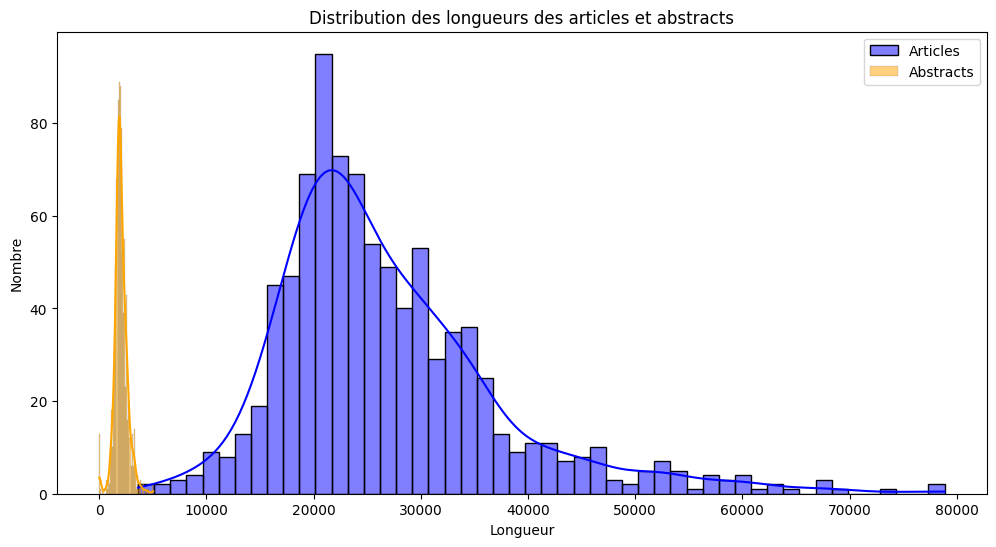

In [5]:
# Histogramme des longueurs
plt.figure(figsize=(12, 6))
sns.histplot(df_train['contenu_length'], bins=50, label='Articles', kde=True, color='blue')
sns.histplot(df_train['cible_length'], bins=50, label='Abstracts', kde=True, color='orange')
plt.title("Distribution des longueurs des articles et abstracts")
plt.xlabel("Longueur")
plt.ylabel("Nombre")
plt.legend()
plt.show()

In [6]:
# Statistiques descriptives
print("Statistiques descriptives des longueurs des articles :")
print(df_train['contenu_length'].describe())
print("\nStatistiques descriptives des longueurs des abstracts :")
print(df_train['cible_length'].describe())


Statistiques descriptives des longueurs des articles :
count      893.000000
mean     26863.594625
std      10528.128814
min       3620.000000
25%      20202.000000
50%      24341.000000
75%      31508.000000
max      78867.000000
Name: contenu_length, dtype: float64

Statistiques descriptives des longueurs des abstracts :
count     893.000000
mean     2028.342665
std       612.103831
min         0.000000
25%      1709.000000
50%      1958.000000
75%      2342.000000
max      5043.000000
Name: cible_length, dtype: float64


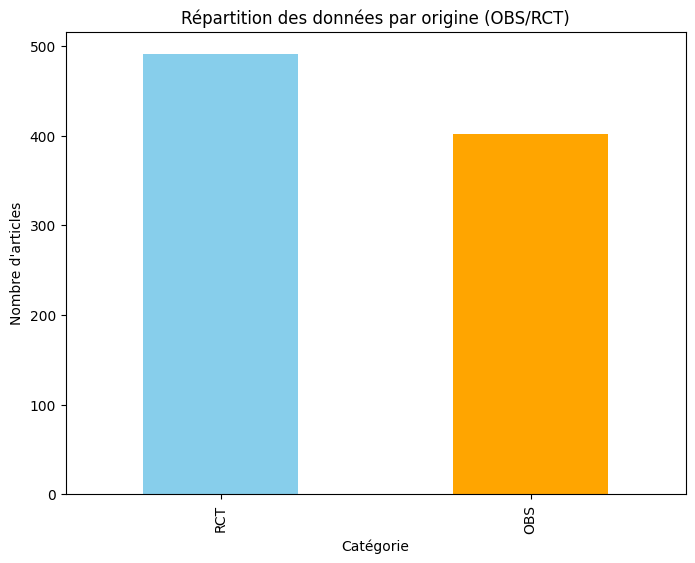

In [7]:
# Proportions des catégories (OBS, RCT)
plt.figure(figsize=(8, 6))
df_train['origine'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Répartition des données par origine (OBS/RCT)")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'articles")
plt.show()


In [8]:
# Relation article-abstract sur le plan de la longueur
correlation = df_train[['contenu_length', 'cible_length']].corr()
print("Corrélation entre la longueur des articles et des abstracts :")
print(correlation)


Corrélation entre la longueur des articles et des abstracts :
                contenu_length  cible_length
contenu_length        1.000000      0.260514
cible_length          0.260514      1.000000


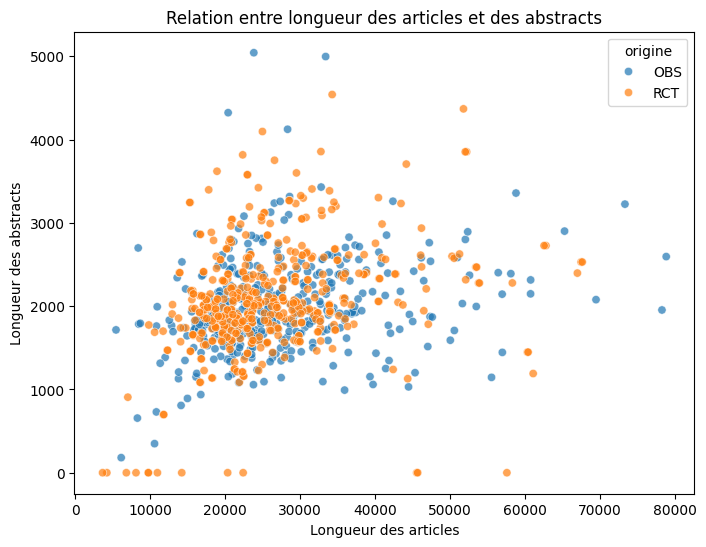

In [9]:
# Scatter plot pour visualiser la relation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='contenu_length', y='cible_length', hue='origine', alpha=0.7)
plt.title("Relation entre longueur des articles et des abstracts")
plt.xlabel("Longueur des articles")
plt.ylabel("Longueur des abstracts")
plt.show()

**Commentaire** : ce résultat de faible corrélation entre la longueur de l'article et la longeur de l'abstract, renvoie aux formats imposés par les journeaux, qui font souvent moins de 500 mots.

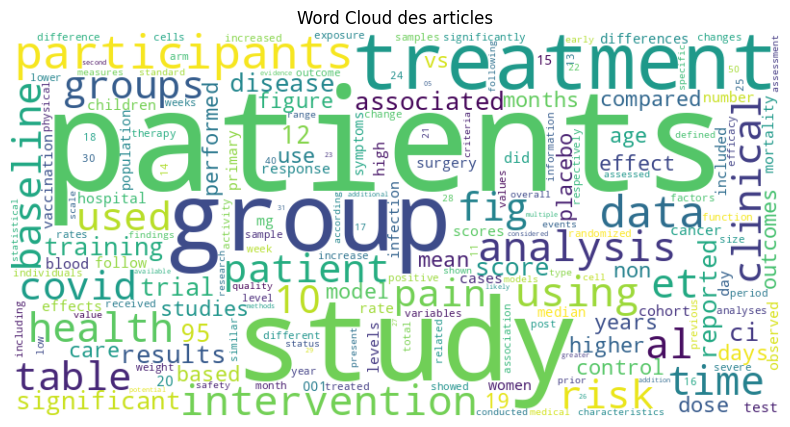

In [21]:
# Word clouds (basés sur score tf-idf)
def generate_wordcloud(texts, title):
    # Vérifier les textes non vides
    combined_texts = texts.dropna().tolist()
    # Calculer les scores TF-IDF
    vectorizer = TfidfVectorizer(max_features=200, stop_words='english')  # Ajustez max_features si nécessaire
    tfidf_matrix = vectorizer.fit_transform(combined_texts)
    # Associer les mots et leurs scores
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))
    # Générer le Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
    # Afficher le Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Pour les articles
generate_wordcloud(df_train['contenu'], "Word Cloud des articles")

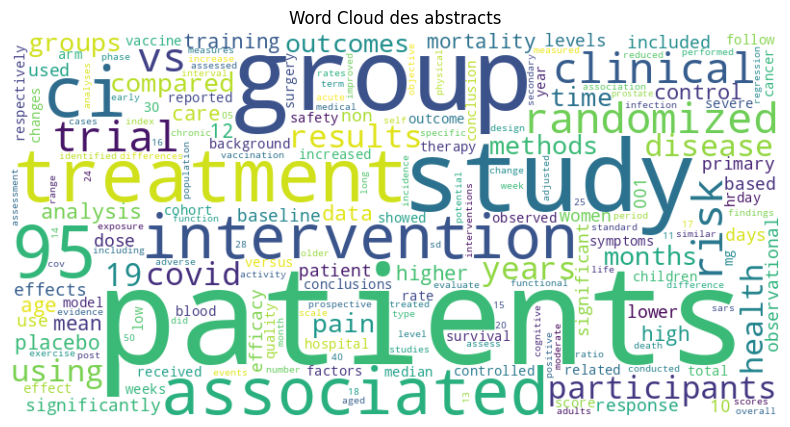

In [22]:
# Pour les abstracts
generate_wordcloud(df_train['cible'], "Word Cloud des abstracts")

**Commentaire**: les mots à score tf-idf élevé dans les abstracts et les articles semblent être présents dans les deux

In [4]:
# Analyse des termes fréquents
df_train['contenu'] = df_train['contenu'].fillna("")
df_train['cible'] = df_train['cible'].fillna("")

vectorizer = CountVectorizer(max_features=100, stop_words=None)  # Pas de suppression des mots ou caractères
article_matrix = vectorizer.fit_transform(df_train['contenu'])
abstract_matrix = vectorizer.fit_transform(df_train['cible'])

article_vocab = vectorizer.get_feature_names_out()
abstract_vocab = vectorizer.get_feature_names_out()

print("Termes les plus fréquents dans les articles :")
print(article_vocab)
print("\nTermes les plus fréquents dans les abstracts :")
print(abstract_vocab)

Termes les plus fréquents dans les articles :
['001' '10' '12' '19' '95' 'after' 'age' 'all' 'among' 'an' 'analysis'
 'and' 'are' 'as' 'associated' 'at' 'background' 'based' 'baseline' 'be'
 'between' 'both' 'by' 'care' 'ci' 'clinical' 'compared' 'conclusions'
 'control' 'controlled' 'covid' 'data' 'disease' 'dose' 'during' 'effects'
 'efficacy' 'follow' 'for' 'from' 'group' 'groups' 'had' 'health' 'high'
 'higher' 'in' 'included' 'increased' 'intervention' 'is' 'lower' 'may'
 'mean' 'methods' 'months' 'more' 'mortality' 'no' 'non' 'not'
 'observational' 'of' 'on' 'or' 'outcomes' 'pain' 'participants'
 'patients' 'placebo' 'primary' 'randomized' 'results' 'risk' 'score'
 'significant' 'significantly' 'study' 'than' 'that' 'the' 'these' 'this'
 'time' 'to' 'training' 'treatment' 'trial' 'two' 'up' 'use' 'used'
 'using' 'vs' 'was' 'we' 'were' 'who' 'with' 'years']

Termes les plus fréquents dans les abstracts :
['001' '10' '12' '19' '95' 'after' 'age' 'all' 'among' 'an' 'analysis'
 'and'

In [29]:
# Analyse sémantique - Similarité cosinus
vectorizer = CountVectorizer()
article_vectors = vectorizer.fit_transform(df_train['contenu']).toarray()
abstract_vectors = vectorizer.transform(df_train['cible']).toarray()

similarities = [cosine_similarity([a], [b])[0][0] for a, b in zip(article_vectors, abstract_vectors)]
df_train['similarity'] = similarities

print("\nSimilarité moyenne entre articles et abstracts :", np.mean(similarities))


Similarité moyenne entre articles et abstracts : 0.7881347221073179


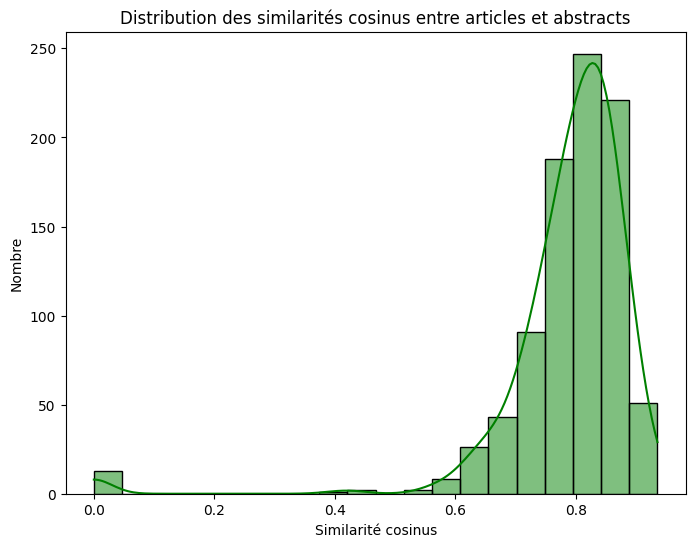

In [30]:
# Histogramme des similarités
plt.figure(figsize=(8, 6))
sns.histplot(df_train['similarity'], bins=20, kde=True, color='green')
plt.title("Distribution des similarités cosinus entre articles et abstracts")
plt.xlabel("Similarité cosinus")
plt.ylabel("Nombre")
plt.show()

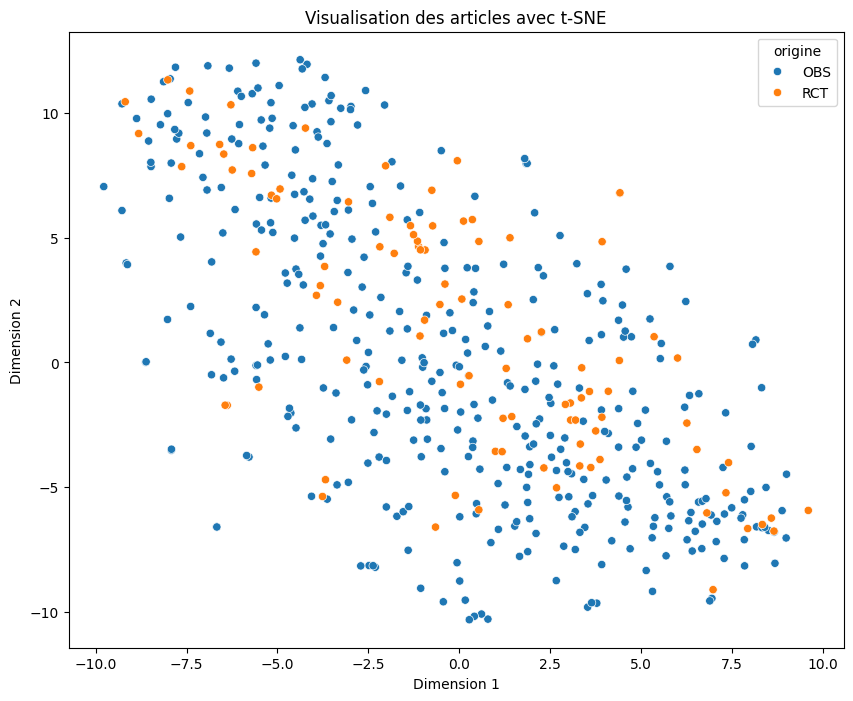

In [31]:
# Visualisation de potentiels clusters avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(article_vectors[:500])  # Limiter pour éviter un temps long
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=df_train['origine'][:500])
plt.title("Visualisation des articles avec t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


**Commentaire**: Les OBS et RCT ne semblent pas se comporter en clusters différenciés. Ce qui est un argument en faveur d'un traitement unifié pour les deux types d'articles.

In [33]:
# Analyse des Structures IMRAD
def check_sections(text):
    """
    Vérifie si un texte contient les sections IMRAD (Introduction ou Background, Methods, Results, Discussion).

    Args:
    - text (str): Le texte à analyser.

    Returns:
    - bool: True si toutes les sections sont présentes, False sinon.
    """
    # Sections possibles pour Introduction
    intro_variants = ['introduction', 'background']

    # Vérifier si l'une des variantes d'intro est présente
    has_intro = any(variant in text.lower() for variant in intro_variants)

    # Vérifier les autres sections
    other_sections = ['methods', 'results', 'discussion']
    has_other_sections = all(section in text.lower() for section in other_sections)

    return has_intro and has_other_sections

# Appliquer la fonction sur le contenu
df_train['has_imrad'] = df_train['contenu'].apply(check_sections)

# Calculer le pourcentage d'articles ayant IMRAD
imrad_percentage = df_train['has_imrad'].mean() * 100
print("Pourcentage d'articles avec les sections IMRAD complètes :")
print(f"{imrad_percentage:.2f}%")

Pourcentage d'articles avec les sections IMRAD complètes :
85.44%


**Commentaire**: ce fort taux de structuration est bon signe pour l'approche envisagée. Et nous évitera des traitements laborieux de structuration dans la suite. ( Mon idée simple à ce stade est de réaliser un pourcentage d'extraction sur chaque section)

In [5]:
# Suppression des lignes dont l'abstract est une chaine vide

# Nombre initial de lignes
initial_rows = df_train.shape[0]

# Supprimer les lignes où l'abstract est une chaîne vide
df_train = df_train[df_train['cible'].str.strip() != ""]

# Nombre final de lignes
final_rows = df_train.shape[0]

# Calcul et affichage du nombre de lignes supprimées
removed_rows = initial_rows - final_rows
print(f"Nombre de lignes supprimées : {removed_rows}")


Nombre de lignes supprimées : 13


In [6]:
# Partager les articles pour les besoins de l'entrainement et de la validation:

from sklearn.model_selection import train_test_split

# Réserver des données pour des validations finales locales
df_train_val, df_test_local = train_test_split(df_train, test_size=0.025, random_state=42) # par manque de temps et de ram GPU, seulement une vingtaine pour le test en local

# Étape 2 : partager le reste en train/val
df_train, df_val = train_test_split(df_train_val, test_size=0.2 , random_state=42)

# Vérification des tailles des ensembles
print(f"Nombre de lignes dans df_train : {df_train.shape[0]}")
print(f"Nombre de lignes dans df_val : {df_val.shape[0]}")
print(f"Nombre de lignes dans df_test_local : {df_test_local.shape[0]}")


Nombre de lignes dans df_train : 686
Nombre de lignes dans df_val : 172
Nombre de lignes dans df_test_local : 22


### 3.2 Acquisition du modèle et tests préliminaires

- **Modèle LLAMA 3 8B Ultramedical**

In [7]:
#Charger le modèle

model_id = "TsinghuaC3I/Llama-3.1-8B-UltraMedical"

# Charger le modèle en demi-précision bfloat16
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda",
    torch_dtype=torch.bfloat16,  # Utiliser bfloat16 pour économiser la mémoire
    cache_dir="./cache",  # Répertoire pour un cache local (je travaille avec colab, l'environnement transformers compris est éphémère)
)

model.config.max_position_embeddings = 16384 # (Autant profiter d'une large fenêtre, car la taille par défaut est d'uniquement 512)
# Charger le tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, cache_dir="./cache")
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

# Indiquer explicitement au tokenizer une longueur max
tokenizer.model_max_length = 16384

# Confirmer le bon déroulement
print("Modèle chargé avec torch.bfloat16 (half-precision étendue).")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Modèle chargé avec torch.bfloat16 (half-precision étendue).


- **Test généraliste préliminaire: poser une question au modèle**

In [40]:
# Essai généraliste avec juste un prompt

# Messages
messages = [
    {"role": "user", "content": "Qu'est ce qu'un résumé d'article scientifique ?"}
]

# Créer le prompt avec balises
prompt = (
    f"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n"
    f"{messages[0]['content']}<|eot_id|>\n"
    f"<|start_header_id|>assistant<|end_header_id|>\n"
)

# Encoder le prompt
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

# Paramètres de génération
gen_params = {

    "temperature": 0.7,
    "top_p": 0.9,
    "max_new_tokens": 300,
    "pad_token_id": tokenizer.eos_token_id,
    "eos_token_id": tokenizer.eos_token_id,
    "do_sample": True,  # Activer l'échantillonnage
    "num_return_sequences": 1,
    "no_repeat_ngram_size": 3,  # Éviter les répétitions
    "repetition_penalty": 1.2  # Pénaliser les répétitions
}

# Générer la réponse
with torch.no_grad():
    outputs = model.generate(**inputs, **gen_params)

# Décoder la réponse générée
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)

# Extraire uniquement la réponse de l'assistant
start_token = "<|start_header_id|>assistant<|end_header_id|>\n"
end_token = "<|eot_id|>"
response = generated_text.split(start_token)[-1].split(end_token)[0].strip()

# Afficher la réponse
print(response)

Un résumés d’article scientifique est une brève synthèse de l'essentiel des informations contenues dans un article ou document académique. Il vise à fournir aux lecteurs non spécialistes, mais également au grand public et aux chercheurs du domaine connexe, les lignes directrices clés de la recherche présentée. Ce résumefait accompli:

- **Identification Rapide**: Permettre à ceux qui ne disposent pas du temps nécessaire pour lire l'intégralité de l'article d'être informés sur ses principaux points.
  
- **Facilitation de la Recherche**: Aider les universitaires dans leur exploration en signalant des articles pertinents sans avoir besoin de parcourir tous les textes.

- **Système de Classification Scientifique**: Les revues mettent souvent leurs résumès à disposition de bases de données bibliographiques telles que PubMed, Scopus, etc., facilitant ainsi le suivi et l'étude plus approfondie de thèmes spécifiques.

Le résuméfait standard comprend généralement :

1. **Introduction** : Prése

- **Générer un premier set de prédictions avec un prompt naif:**

prompt naîf:

Here is a scientific article. Create an abstract for it that adheres to standard abstract guidelines and optimizes for a high ROUGE-2 score in its evaluation

In [42]:
# généreer un premier set de prédictions , simple, basé sur un prompt naif
def generer_resume(article):
    prompt = (
    f"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n"
    f"Here is a scientific article. Create an abstract for it that adheres to standard abstract guidelines and optimizes for a high ROUGE-2 score in its evaluation :"

    f"\n\nArticle to summarize:\n{article}\n"
    f"<|eot_id|>\n"
    f"<|start_header_id|>assistant<|end_header_id|>\n"
)

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    gen_params = {
        "temperature": 0.5, # une valeur médiane de créativité
        "top_p": 0.9,
        "pad_token_id": tokenizer.eos_token_id,
        "max_new_tokens": 500,
        "do_sample": True,
        "num_return_sequences": 1,
        "no_repeat_ngram_size": 3,
        "repetition_penalty": 1.2
    }

    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_params)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    start_token = "<|start_header_id|>assistant<|end_header_id|>\n"
    end_token = "<|eot_id|>"
    summary = generated_text.split(start_token)[-1].split(end_token)[0].strip()

    return summary

# Appliquer la fonction pour chaque article du dataset test de soumission
submission_data = []
for _, row in df_test.iterrows():
    summary = generer_resume(row["contenu"])
    submission_data.append({"id": row["reference"], "abstract": summary})
    print(f"abstract article {_} généré .")

# Créer un nouveau DataFrame avec les colonnes demandées
submission_df = pd.DataFrame(submission_data)

# Sauvegarder dans un nouveau fichier CSV
output_file = "./datasets/submission_naif_prompt.csv"
submission_df.to_csv(output_file, index=False)

print(f"Fichier CSV de soumission créé : {output_file}")

abstract article 0 généré .
abstract article 1 généré .
abstract article 2 généré .
abstract article 3 généré .
abstract article 4 généré .
abstract article 5 généré .
abstract article 6 généré .
abstract article 7 généré .
abstract article 8 généré .
abstract article 9 généré .
abstract article 10 généré .
abstract article 11 généré .
abstract article 12 généré .
abstract article 13 généré .
abstract article 14 généré .
abstract article 15 généré .
abstract article 16 généré .
abstract article 17 généré .
abstract article 18 généré .
abstract article 19 généré .
abstract article 20 généré .
abstract article 21 généré .
abstract article 22 généré .
abstract article 23 généré .
abstract article 24 généré .
abstract article 25 généré .
abstract article 26 généré .
abstract article 27 généré .
abstract article 28 généré .
abstract article 29 généré .
abstract article 30 généré .
abstract article 31 généré .
abstract article 32 généré .
abstract article 33 généré .
abstract article 34 géné

**Commentaire** : Cette génération avec un un prompt naîf obtient un score de 4-5 % sur la platforme.

- **Générer un deuxième set de prédictions avec un prompt spécifique:**

prompt spécifique:

You are an expert in medical article summarization. Your task is to create a highly accurate extractive summary, which will serve as the abstract for the article. This abstract should be composed of the most important sentences directly extracted from the original text. Please do not paraphrase or alter the sentences; instead, preserve their original wording.

Focus on identifying sentences that:

Summarize the introduction or background section.

Summarize the methodology section.

Summarize the results section.

Summarize the discussion and conclusion section.

Additional guidelines:

Extract sentences exactly as they appear in the original text.

Prioritize sentences containing quantitative results.

Maintain the chronological order of the selected sentences as they appear in the article.

Aim for a length comparable to a typical abstract, approximately 250–300 words.

The resulting abstract should resemble those commonly seen in other medical articles.

Here is the article to summarize:

{article}"

In [43]:
# généreer un deuxième set de prédictions , plus extractif, basé sur l'orientation par le language naturel
def generer_resume(article):
    prompt = (
    f"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n"
    f"You are an expert in medical article summarization. Your task is to create a highly accurate extractive summary (the abstract) by selecting and preserving the most important original sentences from the text. Do not paraphrase or modify the selected sentences. Focus on identifying sentences that:"
    f"\n1. Summarize the introduction or background section"
    f"\n2. Summarize the methodology section"
    f"\n3. Summarize the results section"
    f"\n4. Summarize the discussion and conclusion section"
    f"\n- Extract sentences verbatim, keeping original wording"
    f"\n- Prioritize sentences with quantitative results"
    f"\n- Maintain chronological order of selected sentences"
    f"\n- Target a length similar to a typical abstract (~250-300 words)"
    f"\n- The result you provide is an abstract for the article, similar to the abstracts you may have seen for other medical articles"
    f"\n\nArticle to summarize:\n{article}\n"
    f"<|eot_id|>\n"
    f"<|start_header_id|>assistant<|end_header_id|>\n"
)

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    gen_params = {
        "temperature": 0.3, # On baisse cette valeur en espérant plus de conformité au texte original
        "top_p": 0.9,
        "pad_token_id": tokenizer.eos_token_id,
        "max_new_tokens": 400,
        "do_sample": True,
        "num_return_sequences": 1,
        "no_repeat_ngram_size": 3,
        "repetition_penalty": 1.2
    }

    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_params)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    start_token = "<|start_header_id|>assistant<|end_header_id|>\n"
    end_token = "<|eot_id|>"
    summary = generated_text.split(start_token)[-1].split(end_token)[0].strip()

    return summary

# Appliquer la fonction pour chaque article du dataset test de soumission
submission_data = []
for _, row in df_test.iterrows():
    summary = generer_resume(row["contenu"])
    submission_data.append({"id": row["reference"], "abstract": summary})
    print(f"abstract article {_} généré .")

# Créer un nouveau DataFrame avec les colonnes demandées
submission_df = pd.DataFrame(submission_data)

# Sauvegarder dans un nouveau fichier CSV
output_file = "./datasets/submission_specific_prompt2.csv"
submission_df.to_csv(output_file, index=False)

print(f"Fichier CSV de soumission créé : {output_file}")

abstract article 0 généré .
abstract article 1 généré .
abstract article 2 généré .
abstract article 3 généré .
abstract article 4 généré .
abstract article 5 généré .
abstract article 6 généré .
abstract article 7 généré .
abstract article 8 généré .
abstract article 9 généré .
abstract article 10 généré .
abstract article 11 généré .
abstract article 12 généré .
abstract article 13 généré .
abstract article 14 généré .
abstract article 15 généré .
abstract article 16 généré .
abstract article 17 généré .
abstract article 18 généré .
abstract article 19 généré .
abstract article 20 généré .
abstract article 21 généré .
abstract article 22 généré .
abstract article 23 généré .
abstract article 24 généré .
abstract article 25 généré .
abstract article 26 généré .
abstract article 27 généré .
abstract article 28 généré .
abstract article 29 généré .
abstract article 30 généré .
abstract article 31 généré .
abstract article 32 généré .
abstract article 33 généré .
abstract article 34 géné

**Commentaire**: Cette génération avec un prompt spécifique obtient un score de l'ordre de 6-7 % sur la plateforme.

### 3.3. Méthode LoRA pour spécialiser le modèle

a) **Fondement de la méthode LoRA**



La méthode LoRA part d'une observation fondamentale : lors du fine-tuning d'un LLM, les adaptations nécessaires pour une tâche spécifique peuvent souvent être capturées via des modifications de rang faible des matrices de poids originales.

Dans les LLMs comme LLaMA, les matrices de poids $W \in \mathbb{R}^{d \times k}$ sont généralement de rang élevé. Cependant, les adaptations requises pour une tâche spécifique peuvent souvent être approximées par des mises à jour de rang faible :

$\Delta W = BA$

où $B \in \mathbb{R}^{d \times r}$ et $A \in \mathbb{R}^{r \times k}$ avec $r \ll \min(d,k)$



Pour une matrice de poids pré-entraînée $W_0$, LoRA propose de l'adapter comme suit :

$W = W_0 + \Delta W = W_0 + BA$

où :
* $W_0$ reste gelé (frozen) pendant l'entraînement
* Seules les matrices $B$ et $A$ sont entraînées
* $r$ est le rang de l'adaptation (hyperparamètre)

La transformation d'une entrée $x$ devient :

$h = W_0x + BAx = W_0x + \frac{\alpha}{r}BAx$

où $\alpha$ est un facteur d'échelle configurable

b) **Avantages pour la Spécialisation des LLMs**

Efficacité Mémoire

Pour une matrice $W_0 \in \mathbb{R}^{d \times k}$, LoRA réduit le nombre de paramètres entraînables de :
- Original : $d \times k$ paramètres
- LoRA : $r(d + k)$ paramètres
- Ratio de réduction : $\frac{r(d + k)}{d \times k}$

c) **Exemple Numérique**

Pour une matrice d'attention de LLaMA (d=4096, k=4096) :
- Paramètres originaux : 16.8M
- Paramètres LoRA (r=16) : 131K
- Réduction mémoire : ~99%

d) **Avantages Pratiques**

1. **Efficience Computationnelle**
  - Réduction de l'empreinte mémoire GPU
  - Accélération de l'entraînement
  - Possibilité de faire du fine-tuning sur des GPUs de plus petite capacité

2. **Modularité**
  - Plusieurs adaptations peuvent être stockées pour différentes tâches
  - Possibilité de switcher entre spécialisations sans recharger le modèle complet

3. **Stabilité**
  - Risque réduit d'oubli catastrophique
  - Préservation des connaissances du modèle de base

d) Application à notre cas LLaMA-3-UltraMedical

Configuration utilisée :

```python
lora_config = LoraConfig(
   r=16,                # Rang de l'adaptation
   lora_alpha=64,       # Facteur d'échelle
   target_modules=[     # Modules ciblés
       "q_proj",        # Projections d'attention (matrices têtes d'attention)
       "k_proj",
       "v_proj",
       "o_proj",
       "down_proj",     # Projections feed-forward
       "up_proj"
   ],
   lora_dropout=0.1,
   bias="none",
   task_type="CAUSAL_LM"
)
```

In [28]:
# Conditionner des données pour l'entrée du modèle de ré-entrainement de bas rang
# Séparation des features (X) et des cibles (y)
X_train = df_train['contenu']
y_train = df_train['cible']

X_val = df_val['contenu']
y_val = df_val['cible']

# Vérification des dimensions
print("Dimensions des données :")
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_val : {X_val.shape}")
print(f"y_val : {y_val.shape}")

Dimensions des données :
X_train : (668,)
y_train : (668,)
X_val : (168,)
y_val : (168,)


In [29]:
# Spécifier la config LoRA
from peft import LoraConfig, get_peft_model

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "down_proj","up_proj"], # Matrices têtes d'attention + MLP
    lora_dropout=0.2,
    bias="none", # ici nous n adaptons pas les biais
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, lora_config) # ici on obtient le modèle enrichi des couches LoRA, non encore entrainées

In [30]:
# Spécifier les paramètres d'entrainement
from transformers import TrainingArguments

# Définir le répertoire de sortie où le modèle ajusté et les fichiers associés seront sauvegardés.
OUTPUT_DIR = "./models/llama3_UltraMedical_LoRA_general"

# Configuration des paramètres d'entraînement à l'aide de TrainingArguments
training_arguments = TrainingArguments(
    # Taille du lot d'entraînement par composante (GPU/TPU/CPU). Ici, 2 exemples par composante.
    per_device_train_batch_size=2,

    # Nombre d'accumulations de gradients avant une mise à jour des poids. Cela simule un lot effectif de taille plus grande.
    gradient_accumulation_steps=4,  # Lot effectif = 2 x 4 = 8

    # Optimiseur utilisé pour la mise à jour des poids. "paged_adamw_32bit", c'est  une version adaptée de l'optimiseur AdamW.
    optim="paged_adamw_32bit",

    # Fréquence des logs pendant l'entraînement, ici à chaque étape.
    logging_steps=1,

    # Taux d'apprentissage initial pour l'optimisation.
    learning_rate=3e-5,

    # Activer les calculs en demi-précision (bfloat16) pour accélérer les calculs tout en réduisant la consommation de mémoire.
    bf16=True,

    # Norme maximale des gradients pour éviter l'explosion des gradients.
    max_grad_norm=0.3,  # Limite la norme des gradients à 0.3.

    # Nombre total d'époques d'entraînement.
    num_train_epochs=4,

    # Stratégie d'évaluation : ici, une évaluation est effectuée à intervalles réguliers ("steps").
    evaluation_strategy="steps",

    # Intervalle (en nombre d'étapes) pour effectuer une évaluation. Ici, 20% des étapes totales.
    eval_steps=0.2,  # Proportion des étapes (relative au dataset).

    # Fraction de l'entraînement utilisée comme "warmup" pour augmenter progressivement le taux d'apprentissage.
    warmup_ratio=0.05,  # 5% des étapes pour le warmup.

    # Stratégie de sauvegarde des checkpoints : ici, un modèle est sauvegardé à la fin de chaque époque.
    save_strategy="epoch",

    # Grouper les exemples d'entraînement de taille similaire pour améliorer l'efficacité.
    group_by_length=True,

    # Répertoire de sortie pour sauvegarder les: modèle, logs et checkpoints.
    output_dir=OUTPUT_DIR,

    # Outil de reporting utilisé pour surveiller l'entraînement : ici, TensorBoard.
    report_to="tensorboard",

    # Sauvegarder les checkpoints au format "safetensors" (format sécurisé et optimisé pour les modèles).
    save_safetensors=True,

    # Type de planificateur de taux d'apprentissage. "cosine" diminue le taux de manière progressive en suivant une courbe cosinus.
    lr_scheduler_type="cosine",

    # Seed (graine aléatoire) pour la reproductibilité des résultats.
    seed=42,
)

# Désactiver le cache dans le modèle pour réduire la consommation de mémoire pendant l'entraînement.
model.config.use_cache = False

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
# Préparer les données et le trainer :

# Le SFTTrainer est utilisé pour un fine-tuning supervisé (Supervised Fine-Tuning) des modèles de langage.
from trl import SFTTrainer


# permet de gérer des ensembles de données de manière optimisée pour les modèles de la bibliothèque Transformers.
from datasets import Dataset

# Conditionnement du dataset d'entraînement à partir des données X_train et y_train
train_dataset = Dataset.from_dict({
    "text": X_train,  # Texte des articles ou entrées d'entraînement
    "label": y_train  # Les labels associés, si pertinents (par exemple, pour des tâches supervisées)
})

# Conditionnement du dataset de validation à partir des données X_val et y_val
val_dataset = Dataset.from_dict({
    "text": X_val,  # Texte des articles ou entrées de validation
    "label": y_val  # Les labels associés pour l'évaluation
})

# Configuration et instanciation du SFTTrainer
trainer = SFTTrainer(
    model=model,  # Le modèle de base sur lequel le fine-tuning sera appliqué
    train_dataset=train_dataset,  # L'ensemble de données pour l'entraînement supervisé
    eval_dataset=val_dataset,  # L'ensemble de données pour la validation
    peft_config=lora_config,  # Configuration LoRA pour appliquer une adaptation efficace des poids
    dataset_text_field="text",  # Nom du champ contenant le texte dans les datasets
    max_seq_length=1024,  # Longueur maximale des séquences d'entrée (troncation si dépassement)
    tokenizer=tokenizer,  # Tokeniseur associé au modèle, pour encoder les entrées
    args=training_arguments,  # Arguments d'entraînement configurés avec TrainingArguments
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field, max_seq_length. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:283: UserWarning: You passed a `max_seq_length` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:321: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will over

Map:   0%|          | 0/668 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:401: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  super().__init__(


In [32]:
# Lancer l'entrainement
trainer.train()

Step,Training Loss,Validation Loss
67,1.827600,1.832004
134,1.892900,1.817922
201,1.737900,1.812064
268,1.644000,1.810723


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


TrainOutput(global_step=332, training_loss=1.7930996288736183, metrics={'train_runtime': 832.7199, 'train_samples_per_second': 3.209, 'train_steps_per_second': 0.399, 'total_flos': 1.221795445211136e+17, 'train_loss': 1.7930996288736183, 'epoch': 3.9580838323353293})

In [33]:
# D'abord fusionner le modèle avec les adaptateurs LoRA
merged_model = trainer.model.merge_and_unload()

output_dir = "./models/LLama3_ultramedical_lora_finetuned"  # choisissez votre chemin
merged_model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./models/LLama3_ultramedical_lora_finetuned/tokenizer_config.json',
 './models/LLama3_ultramedical_lora_finetuned/special_tokens_map.json',
 './models/LLama3_ultramedical_lora_finetuned/tokenizer.json')

**Commentaire:** l'erreur de généralisation lors de l'entrainement LoRA a baissé, essayons de quantifier l'amélioration en calculant le score rouge sur df_test_local

- **Génération d'un set de prédictions avec le modèle finetuné**

In [7]:
# Charger le modèle fine tuné
output_dir = "./models/LLama3_ultramedical_lora_finetuned"
model = AutoModelForCausalLM.from_pretrained(output_dir).to('cuda')

# Charger le tokenizer associé
tokenizer = AutoTokenizer.from_pretrained(output_dir)

print("Modèle et tokenizer chargés avec succès !")

model-00003-of-00004.safetensors:  40%|###9      | 1.95G/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

Loading adapter weights from ./models/LLama3_ultramedical_lora_finetuned led to missing keys in the model: model.layers.0.self_attn.q_proj.lora_A.default.weight, model.layers.0.self_attn.q_proj.lora_B.default.weight, model.layers.0.self_attn.k_proj.lora_A.default.weight, model.layers.0.self_attn.k_proj.lora_B.default.weight, model.layers.0.self_attn.v_proj.lora_A.default.weight, model.layers.0.self_attn.v_proj.lora_B.default.weight, model.layers.0.self_attn.o_proj.lora_A.default.weight, model.layers.0.self_attn.o_proj.lora_B.default.weight, model.layers.0.mlp.up_proj.lora_A.default.weight, model.layers.0.mlp.up_proj.lora_B.default.weight, model.layers.0.mlp.down_proj.lora_A.default.weight, model.layers.0.mlp.down_proj.lora_B.default.weight, model.layers.1.self_attn.q_proj.lora_A.default.weight, model.layers.1.self_attn.q_proj.lora_B.default.weight, model.layers.1.self_attn.k_proj.lora_A.default.weight, model.layers.1.self_attn.k_proj.lora_B.default.weight, model.layers.1.self_attn.v_pr

Modèle et tokenizer chargés avec succès !


In [8]:
# généreer un set de prédictions , avec un prompt spécifique et le modèle finetuné par LoRA
def generer_resume(article):
    prompt = (
    f"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n"
    f"You are an expert in medical article summarization. Your task is to create a highly accurate extractive summary (the abstract) by selecting and preserving the most important original sentences from the text. Do not paraphrase or modify the selected sentences. Focus on identifying sentences that:"
    f"\n1. Summarize the introduction or background section"
    f"\n2. Summarize the methodology section"
    f"\n3. Summarize the results section"
    f"\n4. Summarize the discussion and conclusion section"
    f"\n- Extract sentences verbatim, keeping original wording"
    f"\n- Prioritize sentences with quantitative results"
    f"\n- Maintain chronological order of selected sentences"
    f"\n- Target a length similar to a typical abstract (~250-300 words)"
    f"\n- The result you provide is an abstract for the article, similar to the abstracts you may have seen for other medical articles"
    f"\n\nArticle to summarize:\n{article}\n"
    f"<|eot_id|>\n"
    f"<|start_header_id|>assistant<|end_header_id|>\n"
)

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    gen_params = {
        "temperature": 0.3, # On baisse cette valeur en espérant plus de conformité au texte original
        "top_p": 0.9,
        "pad_token_id": tokenizer.eos_token_id,
        "max_new_tokens": 400,
        "do_sample": True,
        "num_return_sequences": 1,
        "no_repeat_ngram_size": 3,
        "repetition_penalty": 1.2
    }

    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_params)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    start_token = "<|start_header_id|>assistant<|end_header_id|>\n"
    end_token = "<|eot_id|>"
    summary = generated_text.split(start_token)[-1].split(end_token)[0].strip()

    return summary

# Appliquer la fonction pour chaque article du dataset test de soumission
submission_data = []
for _, row in df_test_local.iterrows():
    summary = generer_resume(row["contenu"])
    submission_data.append({"id": row["reference"],"article": row["contenu"], "origine": row["origine"], "abstract_original": row["cible"], "abstract_genere": summary})
    print(f"abstract article {_} généré .")

# Créer un nouveau DataFrame avec les colonnes demandées
submission_df = pd.DataFrame(submission_data)

# Sauvegarder dans un nouveau fichier CSV
output_file = "./datasets/submission_specific_finetuned1.csv"
submission_df.to_csv(output_file, index=False)

print(f"Fichier CSV de soumission créé : {output_file}")

abstract article 331 généré .
abstract article 247 généré .
abstract article 801 généré .
abstract article 316 généré .
abstract article 215 généré .
abstract article 688 généré .
abstract article 589 généré .
abstract article 463 généré .
abstract article 826 généré .
abstract article 39 généré .
abstract article 430 généré .
abstract article 704 généré .
abstract article 888 généré .
abstract article 328 généré .
abstract article 615 généré .
abstract article 23 généré .
abstract article 503 généré .
abstract article 198 généré .
abstract article 110 généré .
abstract article 738 généré .
abstract article 681 généré .
abstract article 426 généré .
Fichier CSV de soumission créé : ./datasets/submission_specific_finetuned1.csv


In [10]:
torch.cuda.empty_cache()

- **Fonction pour calculer divers scores ( rouge 1, rouge 2, bleu ), par article**

In [8]:
from rouge_score import rouge_scorer
from sacrebleu import sentence_bleu
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

def ajouter_scores(df, ref_col="abstract_original", pred_col="abstract_genere"):
    """
    Ajoute les colonnes ROUGE-1, ROUGE-2, BLEU, et CIDEr au DataFrame en comparant les prédictions aux références.

    Args:
    - df (pd.DataFrame): DataFrame contenant les colonnes de références et de prédictions.
    - ref_col (str): Nom de la colonne contenant les résumés de référence.
    - pred_col (str): Nom de la colonne contenant les résumés générés.

    Returns:
    - pd.DataFrame: DataFrame avec des colonnes supplémentaires pour les scores.
    """
    # Initialiser le tokenizer et le CIDEr
    tokenizer = PTBTokenizer()
    cider = Cider()

    # Colonnes pour stocker les scores
    rouge_1_scores = []
    rouge_2_scores = []
    bleu_scores = []
    cider_scores = []

    # Calcul des scores pour chaque ligne
    for idx, row in df.iterrows():
        reference = row[ref_col]
        prediction = row[pred_col]

        # Calcul des scores ROUGE
        rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
        rouge_scores = rouge.score(reference, prediction)
        rouge_1_scores.append(rouge_scores['rouge1'].recall) # recall : par définition la but est de mesurer l'adéquation entre le bigrammes générés et la ref
        rouge_2_scores.append(rouge_scores['rouge2'].recall)

        # Calcul du score BLEU
        bleu_score = sentence_bleu(prediction, [reference])
        bleu_scores.append(bleu_score.score)



    # Ajouter les colonnes au DataFrame
    df["rouge-1"] = rouge_1_scores
    df["rouge-2"] = rouge_2_scores
    df["bleu"] = bleu_scores


    return df




In [ ]:
# Charger le fichier généré précédemment
submission_df = pd.read_csv("./datasets/submission_specific_finetuned1.csv")

# Ajouter les scores au DataFrame
submission_df = ajouter_scores(submission_df, ref_col="abstract_original", pred_col="abstract_genere")

# Sauvegarder le fichier enrichi avec les scores
output_file_with_scores = "./datasets/submission_specific_finetuned1.csv"
submission_df.to_csv(output_file_with_scores, index=False)

print(f"Fichier enrichi avec scores créé : {output_file_with_scores}")

La moyenne de score rouge 2 est : 0.0623387216472108


<Figure size 1000x600 with 0 Axes>

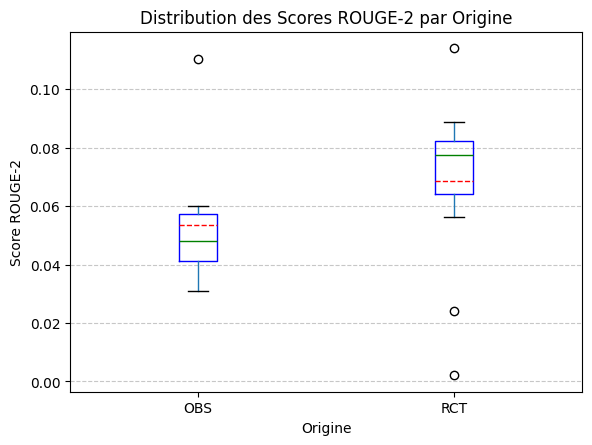

In [25]:
# Apprécions les résultats en fonction de l'origine de l'article
df = pd.read_csv("./datasets/submission_specific_finetuned1.csv")


# Création d'un graphique de distribution
plt.figure(figsize=(10, 6))
df.boxplot(column="rouge-2", by="origine", grid=False, showmeans=True, meanline=True,
           boxprops=dict(color="blue"), meanprops=dict(color="red", linestyle="--"),
           medianprops=dict(color="green"))

print(f"La moyenne de score rouge 2 est : {df['rouge-2'].mean()}")
# Ajouter les détails du graphique
plt.title("Distribution des Scores ROUGE-2 par Origine")
plt.suptitle("")  # Supprime le titre automatique ajouté par `boxplot`
plt.xlabel("Origine")
plt.ylabel("Score ROUGE-2")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Commentaire**:

Le modèle finetuné par LoRA montre une légère amélioration par rapport au modèle de base, mais sans saut qualitatif signifiant. Cela est peut être du à la disproportion entre le nombre de paramètres du modèle et le peu de données dont on dispose. Egalement, une meilleure recherche des hyperparamètres aurait pu potentiellement améliorer le résultat.

Les prédictions sont de meilleure qualité sur les articles d'études contrôlées randomisées.

Dans la suite du travail, nous revenons au modèle de base par souci de rapidité d'exécution et de quantité de mémoire requise sur le GPU.

## 3.4 Mise en place d'une démarche extractive pure, sur base de comparaison des embeddings des phrases

Les essais précédents ne semblent pas concluants. il est certes possible d'améliorer leurs résultats significativement mais au prix fort en calcul et temps consacré.

Je propose cette approche initialement purement extractive. L'idée est de se servir des embedding des phrases construits par le LLM, pour identifier la similarité de chaque phrase avec la sémantique de l'article ou d'une section le composant.

L'abstract sera construit à partir de phrases complètes extraites de l'article, ces phrases sont censées être les plus pertinentes car ce sont celles qui se rapprochent le plus de la sémantique globale de l'article ou d'une section le composant.

- **Quelques outils indispensables pour la tâche d'extraction**

**fonction get_sentance_embedding :** Convertir une phrase ou un texte en embedding (vecteur de représentation) en utilisant le vecteur associé au token spécial [CLS] dans un modèle pré-entraîné de type Transformer (pour nous, le modèle Llama-3 ultramedical).



In [49]:
import torch.nn.functional as F
import re
from typing import List, Tuple



def get_sentence_embedding(text: str) -> torch.Tensor:
    """
    Convertit un texte en embedding basé sur le token [CLS].
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    cls_embedding = outputs.hidden_states[-1][:, 0, :]  # [CLS] embedding
    return cls_embedding.squeeze(0)

**fonction cosine_similarity :** Calcule la similarité cosinus entre deux tenseurs 1D.

In [50]:
def cosine_similarity(vec1: torch.Tensor, vec2: torch.Tensor) -> float:
    """
    Calcule la similarité cosinus entre deux tenseurs 1D.
    """
    if len(vec1.shape) == 1:
        vec1 = vec1.unsqueeze(0)
    if len(vec2.shape) == 1:
        vec2 = vec2.unsqueeze(0)
    sim = F.cosine_similarity(vec1, vec2).item()
    return sim

**fonction sent_tokenize :** Segmentation (très) basique en phrases par la ponctuation de fin (.!?).  

In [51]:
def sent_tokenize(text: str) -> List[str]:
    """
    Segmentation (très) basique en phrases par la ponctuation de fin (.!?).
    """
    sentences = re.split(r'(?<=[.?!])\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences

**fonction split_article_into_sections :** Coupe le texte en 4 parties : Introduction, Methods, Results, Discussion.
    On suppose qu'il y a des balises ou titres explicites ( valide à plus de 85% dans nos données comme vu en première partie).

In [52]:
def split_article_into_sections(text: str) -> dict:
    """
    Coupe le texte en 4 parties : Introduction, Methods, Results, Discussion.
    On suppose qu'il y a des balises ou titres explicites.

    Renvoie un dictionnaire :
    {
      "introduction": "...",
      "methods": "...",
      "results": "...",
      "discussion": "..."
    }
    """
    pattern = r'(?:\d+\s*)?(Introduction|Methods|Results|Discussion)'
    parts = re.split(pattern, text, flags=re.IGNORECASE)

    sections = {
        "introduction": "",
        "methods": "",
        "results": "",
        "discussion": ""
    }

    current_section = None
    for chunk in parts:
        chunk = chunk.strip()
        lower_chunk = chunk.lower()
        if lower_chunk == 'introduction':
            current_section = "introduction"
            continue
        elif lower_chunk == 'methods':
            current_section = "methods"
            continue
        elif lower_chunk == 'results':
            current_section = "results"
            continue
        elif lower_chunk == 'discussion':
            current_section = "discussion"
            continue

        if current_section and chunk:
            sections[current_section] += " " + chunk

    return sections

**fonction extractive_summarization_section :** Résume extractivement une section en sélectionnant 'top_n' phrases les plus similaires à l'embedding de la section considérée.
    Renvoie une liste des (phrase, score, index local).

In [53]:
def extractive_summarization_section(
    section_text: str,
    section_emb: torch.Tensor,
    top_n: int
) -> List[Tuple[str, float]]:
    """
    Résume extractivement une section en sélectionnant 'top_n' phrases les plus similaires
    à l'embedding de la section.

    Renvoie une liste des (phrase, score, index local).
    """
    # Segmenter la section en phrases
    sentences = sent_tokenize(section_text)

    # Calculer les embeddings des phrases et leurs similarités
    scored_sentences = []
    for idx, sent in enumerate(sentences):
        sent_emb = get_sentence_embedding(sent)
        score = cosine_similarity(sent_emb, section_emb)  # Comparer avec l'embedding de la section
        scored_sentences.append((sent, score, idx))

    # Trier par similarité décroissante
    scored_sentences.sort(key=lambda x: x[1], reverse=True)

    # Extraire les top_n et trier par ordre d'apparition dans le texte
    top_scored = scored_sentences[:top_n]
    top_scored.sort(key=lambda x: x[2])

    return top_scored



**fonction extractive_summarization_imrad :** Résume extractivement l'article en utilisant les sections IMRAD.

In [54]:
def extractive_summarization_imrad(
    text: str,
    top_n_total: int = 25,
) -> List[str]:
    """
    1. Sépare l'article en sections IMRAD.
    2. Calcule un embedding par section.
    3. Résume extractivement chaque section en sélectionnant les phrases les plus similaires
       à l'embedding de leur section respective.
    4. Concatène les résultats.
    """
    # Split en sections
    sections = split_article_into_sections(text)

    # Calculer un embedding pour chaque section
    section_embeddings = {}
    for section, content in sections.items():
        section_embeddings[section] = get_sentence_embedding(content)

    # Ratios pour répartir les phrases par section
    ratio_intro, ratio_methods, ratio_results, ratio_discussion = 0.20, 0.25, 0.35, 0.20
    n_intro = int(round(top_n_total * ratio_intro))
    n_methods = int(round(top_n_total * ratio_methods))
    n_results = int(round(top_n_total * ratio_results))
    n_discussion = int(round(top_n_total * ratio_discussion))

    # Ajuster en cas d'erreur d'arrondi
    total_sum = n_intro + n_methods + n_results + n_discussion
    if total_sum != top_n_total:
        n_discussion += top_n_total - total_sum

    # Résumer chaque section en comparant les phrases à l'embedding de leur section
    top_intro = extractive_summarization_section(
        sections["introduction"], section_embeddings["introduction"], n_intro
    )
    top_methods = extractive_summarization_section(
        sections["methods"], section_embeddings["methods"], n_methods
    )
    top_results = extractive_summarization_section(
        sections["results"], section_embeddings["results"], n_results
    )
    top_discussion = extractive_summarization_section(
        sections["discussion"], section_embeddings["discussion"], n_discussion
    )

    # Concaténer dans l'ordre IMRAD
    final_summary = []
    final_summary.extend([sent for (sent, score, idx) in top_intro])
    final_summary.extend([sent for (sent, score, idx) in top_methods])
    final_summary.extend([sent for (sent, score, idx) in top_results])
    final_summary.extend([sent for (sent, score, idx) in top_discussion])

    return final_summary

- **Génération d'un set de prédictions avec le modèle de base, et avec une extraction pure**

In [57]:
# générer un set de prédiction extratif sur le test :

# Appliquer la fonction pour chaque article
submission_data = []
for _, row in df_test_local.iterrows():
    summary = text_summary = " ".join(extractive_summarization_imrad(row["contenu"], top_n_total=13))
    submission_data.append({"id": row["reference"],"article": row["contenu"], "origine": row["origine"], "abstract_original": row["cible"], "abstract_genere": summary})
    print(f"abstract généré pour article {_}")

# Créer un nouveau DataFrame avec les colonnes demandées
submission_df = pd.DataFrame(submission_data)

# Sauvegarder dans un nouveau fichier CSV
output_file = "./datasets/df_test_local_simple_extractive.csv"
submission_df.to_csv(output_file, index=False)



abstract généré pour article 331
abstract généré pour article 247
abstract généré pour article 801
abstract généré pour article 316
abstract généré pour article 215
abstract généré pour article 688
abstract généré pour article 589
abstract généré pour article 463
abstract généré pour article 826
abstract généré pour article 39
abstract généré pour article 430
abstract généré pour article 704
abstract généré pour article 888
abstract généré pour article 328
abstract généré pour article 615
abstract généré pour article 23
abstract généré pour article 503
abstract généré pour article 198
abstract généré pour article 110
abstract généré pour article 738
abstract généré pour article 681
abstract généré pour article 426


In [58]:
# Charger le fichier généré précédemment
submission_df = pd.read_csv("./datasets/df_test_local_simple_extractive.csv")

# Ajouter les scores au DataFrame
submission_df = ajouter_scores(submission_df, ref_col="abstract_original", pred_col="abstract_genere")

# Sauvegarder le fichier enrichi avec les scores
output_file_with_scores = "./datasets/df_test_local_simple_extractive.csv"
submission_df.to_csv(output_file_with_scores, index=False)

print(f"Fichier enrichi avec scores créé : {output_file_with_scores}")

Fichier enrichi avec scores créé : ./datasets/df_test_local_simple_extractive.csv


La moyenne de score rouge 2 est : 0.22914124763580732


<Figure size 1000x600 with 0 Axes>

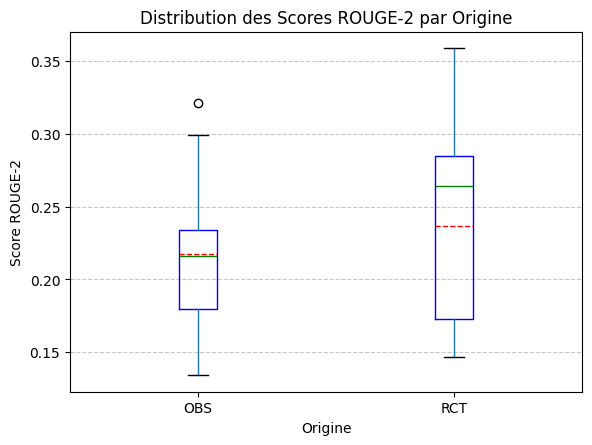

In [59]:
# Apprécions les résultats en fonction de l'origine de l'article
df = pd.read_csv("./datasets/df_test_local_simple_extractive.csv")


# Création d'un graphique de distribution
plt.figure(figsize=(10, 6))
df.boxplot(column="rouge-2", by="origine", grid=False, showmeans=True, meanline=True,
           boxprops=dict(color="blue"), meanprops=dict(color="red", linestyle="--"),
           medianprops=dict(color="green"))

print(f"La moyenne de score rouge 2 est : {df['rouge-2'].mean()}")
# Ajouter les détails du graphique
plt.title("Distribution des Scores ROUGE-2 par Origine")
plt.suptitle("")  # Supprime le titre automatique ajouté par `boxplot`
plt.xlabel("Origine")
plt.ylabel("Score ROUGE-2")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Commentaire**: les résultats initiaux sont prometteurs avec une moyenne de 22.9 de score rouge-2 pour des abstracts générés d'une moyenne de 350 mots (extraction des 13 phrases les plus pertinentes selon la similarité cosin). Essayons d'améliorer nos resultats avec une méthode hybride.

## 3.5. Test de méthode hybride abstractive et extractive

L'idée ici de d'appliquer un prompt spécifique au modèle lui donnant à la fois l'article et un ensemble de phrases identifiées comme les plus pertinentes par la méthode purement extractive.

In [13]:
# générer un set de prédictions, avec la methode hybride
def generer_resume(article, pre_abstract):
    prompt = (
        f"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n"
        f"summarize the medical article"
        f"\n\n Here is the preselected important sentances identified with cosin similarity:\n{pre_abstract}\n"
        f"\n\n And here  is the article:\n{article}\n"
        f"<|eot_id|>\n"
        f"<|start_header_id|>assistant<|end_header_id|>\n"
    )


    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    gen_params = {
        "temperature": 0.9,
        "top_p": 0.9,
        "pad_token_id": tokenizer.eos_token_id,
        "max_new_tokens": 500,
        "do_sample": True,
        "num_return_sequences": 1,
        "no_repeat_ngram_size": 3,
        "repetition_penalty": 1.2
    }

    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_params)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    start_token = "<|start_header_id|>assistant<|end_header_id|>\n"
    end_token = "<|eot_id|>"
    summary = generated_text.split(start_token)[-1].split(end_token)[0].strip()

    return summary

# Appliquer la fonction pour chaque article du dataset test de soumission

df_test = pd.read_csv("./datasets/df_test_local_simple_extractive.csv")
submission_data = []
for _, row in df_test.iterrows():
    summary = generer_resume(row["article"], row["abstract_genere"])
    submission_data.append({"id": row["id"],"article": row["article"], "origine": row["origine"], "abstract_original": row["abstract_original"], "abstract_genere": summary})
    print(f"abstract article {_} généré .")

# Créer un nouveau DataFrame avec les colonnes demandées
submission_df = pd.DataFrame(submission_data)

# Sauvegarder dans un nouveau fichier CSV
output_file = "./datasets/submission_hybride.csv"
submission_df.to_csv(output_file, index=False)

print(f"Fichier CSV de soumission créé : {output_file}")

abstract article 0 généré .
abstract article 1 généré .
abstract article 2 généré .
abstract article 3 généré .
abstract article 4 généré .
abstract article 5 généré .
abstract article 6 généré .
abstract article 7 généré .
abstract article 8 généré .
abstract article 9 généré .
abstract article 10 généré .
abstract article 11 généré .
abstract article 12 généré .
abstract article 13 généré .
abstract article 14 généré .
abstract article 15 généré .
abstract article 16 généré .
abstract article 17 généré .
abstract article 18 généré .
abstract article 19 généré .
abstract article 20 généré .
abstract article 21 généré .
Fichier CSV de soumission créé : ./datasets/submission_hybride.csv


In [14]:
# Charger le fichier généré précédemment
submission_df = pd.read_csv("./datasets/submission_hybride.csv")

# Ajouter les scores au DataFrame
submission_df = ajouter_scores(submission_df, ref_col="abstract_original", pred_col="abstract_genere")

# Sauvegarder le fichier enrichi avec les scores
output_file_with_scores = "./datasets/submission_hybride.csv"
submission_df.to_csv(output_file_with_scores, index=False)

print(f"Fichier enrichi avec scores créé : {output_file_with_scores}")

Fichier enrichi avec scores créé : ./datasets/submission_hybride.csv


La moyenne de score rouge 2 est : 0.05056630213027927


<Figure size 1000x600 with 0 Axes>

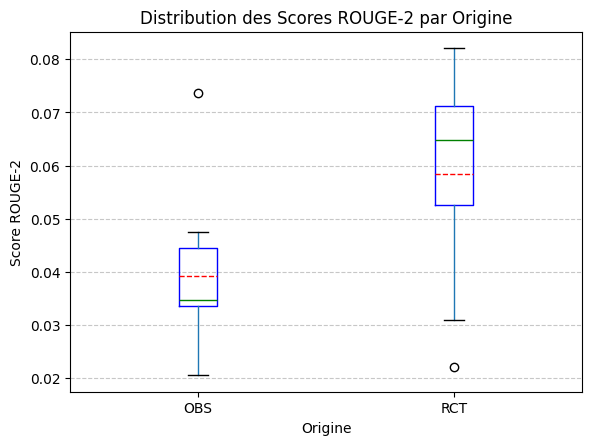

In [15]:
# Apprécions les résultats en fonction de l'origine de l'article
df = pd.read_csv("./datasets/submission_hybride.csv")


# Création d'un graphique de distribution
plt.figure(figsize=(10, 6))
df.boxplot(column="rouge-2", by="origine", grid=False, showmeans=True, meanline=True,
           boxprops=dict(color="blue"), meanprops=dict(color="red", linestyle="--"),
           medianprops=dict(color="green"))

print(f"La moyenne de score rouge 2 est : {df['rouge-2'].mean()}")
# Ajouter les détails du graphique
plt.title("Distribution des Scores ROUGE-2 par Origine")
plt.suptitle("")  # Supprime le titre automatique ajouté par `boxplot`
plt.xlabel("Origine")
plt.ylabel("Score ROUGE-2")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Commentaire**: résultat qui retombe à un niveau quasi identique à une démarche de prompt naif simple.

## 4. Résultats et Discussion

---

Les différentes approches testées ont montré des performances variables en termes de scores ROUGE-2, dans les conditions et hyperparamètres choisis pour les tests:

1. **Approche par prompt naïf**
   * Score ROUGE-2 moyen : 4-5%
   * Performances similaires entre articles RCT et OBS
   * Génération de résumés cohérents mais peu fidèles au texte source

2. **Approche par prompt spécifique**
   * Score ROUGE-2 moyen : 6-7%
   * Légère amélioration par rapport au prompt naïf
   

3. **Fine-tuning LoRA**
   * Score ROUGE-2 moyen : 6-7%
   * Amélioration modeste malgré l'adaptation du modèle
   * Meilleurs résultats sur les articles RCT que OBS
   * Limitations probables dues à la taille réduite du jeu d'entraînement

4. **Approche extractive pure** (sur base de 350 mots)
   * Score ROUGE-2 moyen : 22.9%
   * Amélioration significative des performances
   * Distribution équilibrée entre types d'articles

5. **Approche hybride**
   * Score ROUGE-2 moyen similaire à l'approche abstractive simple
   

Intérressons nous aux résultats de l'approche extractive simple, et commençons par avoir un étalon : un résumé fait de 13 phrases choisies au hasard dans l'article, pour tout le dataset de test local

In [18]:
import re
import random

def random_summary(text, n_sentences=13):
    """
    Génère un résumé aléatoire composé de `n_sentences` phrases tirées du texte.
    """
    # Découper le texte en phrases simples
    sentences = re.split(r'(?<=[.?!])\s+', text.strip())
    # S'assurer qu'il y a assez de phrases dans le texte
    if len(sentences) < n_sentences:
        return " ".join(sentences)
    # Sélectionner aléatoirement `n_sentences` phrases
    random_sentences = random.sample(sentences, n_sentences)
    # Retourner les phrases sélectionnées sous forme de résumé
    return " ".join(random_sentences)

# Charger le dataset
df_test_local = pd.read_csv("./datasets/df_test_local_simple_extractive.csv")

# Appliquer la fonction de résumé aléatoire à chaque article
df_test_local["abstract_random"] = df_test_local["article"].apply(lambda x: random_summary(x, n_sentences=13))

# Sauvegarder le dataset mis à jour
output_file = "./datasets/df_test_local_simple_extractive.csv"
df_test_local.to_csv(output_file, index=False)

print(f"Le dataset avec les résumés aléatoires a été sauvegardé dans : {output_file}")

Le dataset avec les résumés aléatoires a été sauvegardé dans : ./datasets/df_test_local_simple_extractive.csv


Calculons les diverses métriques des résumés aléatoires générés :

In [19]:
from rouge_score import rouge_scorer
from sacrebleu import sentence_bleu
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

def ajouter_scores(df, ref_col="abstract_original", pred_col="abstract_genere"):
    """
    Ajoute les colonnes ROUGE-1, ROUGE-2, BLEU, et CIDEr au DataFrame en comparant les prédictions aux références.

    Args:
    - df (pd.DataFrame): DataFrame contenant les colonnes de références et de prédictions.
    - ref_col (str): Nom de la colonne contenant les résumés de référence.
    - pred_col (str): Nom de la colonne contenant les résumés générés.

    Returns:
    - pd.DataFrame: DataFrame avec des colonnes supplémentaires pour les scores.
    """
    # Initialiser le tokenizer et le CIDEr
    tokenizer = PTBTokenizer()
    cider = Cider()

    # Colonnes pour stocker les scores
    rouge_1_scores = []
    rouge_2_scores = []
    bleu_scores = []
    cider_scores = []

    # Calcul des scores pour chaque ligne
    for idx, row in df.iterrows():
        reference = row[ref_col]
        prediction = row[pred_col]

        # Calcul des scores ROUGE
        rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
        rouge_scores = rouge.score(reference, prediction)
        rouge_1_scores.append(rouge_scores['rouge1'].recall) # recall : par définition la but est de mesurer l'adéquation entre le bigrammes générés et la ref
        rouge_2_scores.append(rouge_scores['rouge2'].recall)

        # Calcul du score BLEU
        bleu_score = sentence_bleu(prediction, [reference])
        bleu_scores.append(bleu_score.score)



    # Ajouter les colonnes au DataFrame
    df["random-rouge-1"] = rouge_1_scores
    df["random-rouge-2"] = rouge_2_scores
    df["random-bleu"] = bleu_scores


    return df

In [20]:
# Charger le fichier généré précédemment
submission_df = pd.read_csv("./datasets/df_test_local_simple_extractive.csv")

# Ajouter les scores au DataFrame
submission_df = ajouter_scores(submission_df, ref_col="abstract_original", pred_col="abstract_random")

# Sauvegarder le fichier enrichi avec les scores
output_file_with_scores = "./datasets/df_test_local_simple_extractive.csv"
submission_df.to_csv(output_file_with_scores, index=False)

print(f"Fichier enrichi avec scores créé : {output_file_with_scores}")

Fichier enrichi avec scores créé : ./datasets/df_test_local_simple_extractive.csv


- **Comparaison des scores moyens entre random et extractive**

<ipython-input-28-97e81e545da4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rouge_2_df, x='Type', y='Score', palette=['skyblue', 'orange'])


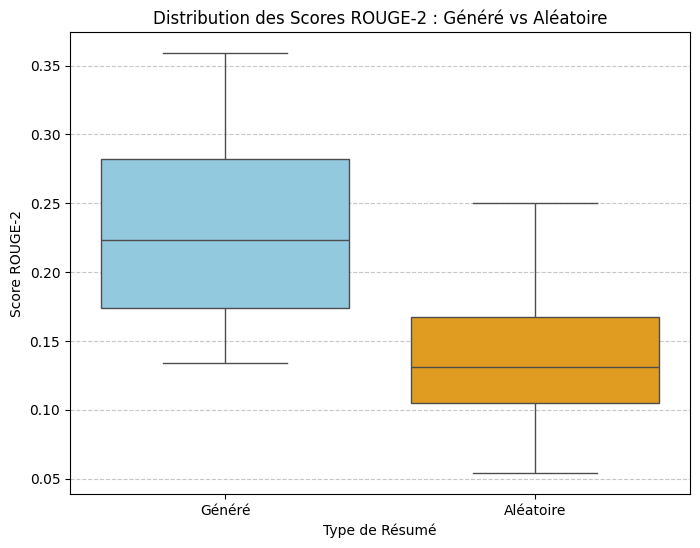

In [28]:
# Boxplot des scores rouge 2 moyens entre extraction ciblée et hasard
df = pd.read_csv("./datasets/df_test_local_simple_extractive.csv")



# Réorganiser les données pour comparer ROUGE-2
rouge_2_df = df.melt(id_vars=['id', 'origine'],
                     value_vars=['rouge-2', 'random-rouge-2'],
                     var_name='Type', value_name='Score')

# Ajouter une colonne pour indiquer Généré ou Aléatoire
rouge_2_df['Type'] = rouge_2_df['Type'].replace({'rouge-2': 'Généré', 'random-rouge-2': 'Aléatoire'})

# Tracer le boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=rouge_2_df, x='Type', y='Score', palette=['skyblue', 'orange'])
plt.title('Distribution des Scores ROUGE-2 : Généré vs Aléatoire')
plt.xlabel('Type de Résumé')
plt.ylabel('Score ROUGE-2')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Commentaire**: l'extraction ciblée par similarité cosinus des embeddings, testée dans ce travail, est significativement supérieure au hasard

- **Appréciation qualitative d'un résumé produit par extraction VS le résumé d'origine**

In [33]:
# Choisir un résumé à analyser (par exemple, le premier du DataFrame)
index = 0
original = df.loc[index, 'abstract_original']
generated = df.loc[index, 'abstract_genere']

# Afficher les deux résumés
print("=== Résumé Original ===\n")
print(original)

print("\n=== Résumé Généré ===\n")
print(generated)


=== Résumé Original ===

1/BACKGROUND: Maternal exposure to particulate air pollution during pregnancy has been linked to multiple adverse birth outcomes causing burden of disease later in the child's life. To date, there is a paucity of data on whether or not ambient particles can both reach and cross the human placenta to exert direct effects on fetal organ systems during gestation. 
2/METHODS: In this analysis, we used maternal-perinatal and fetal samples collected within the framework of two independent studies: the ENVIRONAGE (Environmental Influences on Ageing in Early Life) birth cohort of mothers giving birth at the East-Limburg Hospital in Genk, Belgium, and the SAFeR (Scottish Advanced Fetal Research) cohort of terminated, normally progressing pregnancies among women aged 16 years and older in Aberdeen and the Grampian region, UK. From the ENVIRONAGE study, we included 60 randomly selected mother-neonate pairs, excluding all mothers who reported that they ever smoked. From th

**Commentaire**: Le texte extractif, n'est pas utilisable en l'état comme abstract, car étant par nature un assemblage de phrases extraites de l'article original à des sections différentes, il manque de fluidité et ne peut ni comprimer l'information contenue dans une phrase, ni aggréger l'information.

## Conclusion:

Ce travail visait à explorer les capacités des modèles de langage (LLMs) à produire des résumés scientifiques pour des articles médicaux, tout en comparant différentes approches (naïve, spécifique, fine-tuning LoRA, extraction pure, hybride).

Les résultats montrent que l’approche extractive simple, basée sur la similarité cosinus, offre les meilleurs scores en termes de fidélité (ROUGE-2 moyen de 22.9).

La méthode extractive offre un horizon prometteur car les critères de similarité peuvent être affinés et approximés de façon plus fidèle à la sémantique, en combinant par exemple des critères à une granularité à l'échelle du mot et de la phrase et en implémentant des classifieurs plus sophistiqués de l'importance d'un morceau de texte dans l'article complet. Il est également possible de diversifier ces critères à des considérations de saillance, de nouveauté, et de position [7].

La méthode extractive, peut être également un bon point de départ pour élaguer et enlever l'information inutile à un abstract. Sans lui confier la tâche de résumer, elle peut cibler la matière première féconde à la production d'un bon abstract pour ensuite la donner à système différent qui affinera et produira le résumé.




## Références:

[1] K. Zhang, N. Ding, B. Qi, S. Zeng, H. Li, X. Zhu, Z-R. Chen, and B. Zhou, "UltraMedical: Building Specialized Generalists in Biomedicine," 2024.

[2] Liu, Y., & Lapata, M. (2019). Text summarization with pretrained encoders. *EMNLP 2019*.

[3] Chen, J., et al. (2020). BioMedical text summarization using hierarchical transformers. *Nature Communications*.

[4] Zhang, R., et al. (2022). BioBART: Pretraining and evaluation of a biomedical generative language model. *ACL 2022*.

[5] Lawrence, S., et al. (2021). Factual accuracy in medical text summarization. *NAACL 2021*.

[6] Song, K., et al. (2022). Hybrid extractive-abstractive summarization for medical texts. *EMNLP 2022*.

[7] Said, Raoufdine & Guille, Adrien. (2024). Interactive Document Summarization. 10.1007/978-3-031-56069-9_14.